<a href="https://colab.research.google.com/github/nxshi/IDS131F21/blob/main/MarchMadness/Discontinuity_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
DATADIR = os.path.join('/content/gdrive/MyDrive/IDS131 Project')
os.chdir(DATADIR)

import pandas as pd
sub = pd.read_csv('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/submissions_2019_decorated.csv')
com = pd.read_csv('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/comments_2019_decorated.csv')
tarray = pd.read_csv('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/2019-teams-unique.csv')
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from datetime import timedelta, date
import warnings
warnings.filterwarnings('ignore')
from matplotlib import style
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
com['created_utc'] = com['created_utc'].str.slice(0,10)
sub['created_utc'] = sub['created_utc'].str.slice(0,10)
com = com.append(sub)

In [ ]:
len(tarray)

67

In [ ]:
model.params['threshold']

NameError: ignored

In [ ]:
model.params['Intercept']

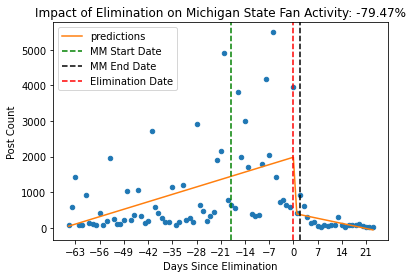

In [ ]:
start = date(2019,1,31)
end = date(2019,4,29)
MMstart = date(2019,3,19)
MMend = date(2019,4,8)
start = pd.to_datetime(start, format = "%Y-%m-%d")
end = pd.to_datetime(end, format = "%Y-%m-%d")
MMstart = pd.to_datetime(MMstart, format = "%Y-%m-%d")
MMend = pd.to_datetime(MMend, format = "%Y-%m-%d")
MS = pd.read_csv('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/Comments_df+plt/Michigan State.csv')
s = MS['created_utc'].value_counts().sort_index()
s.index = pd.to_datetime(s.index.to_list(), format = "%Y-%m-%d")
s.index = pd.to_datetime(s.index, format = "%Y-%m-%d")
elim = date(2019,4,6)
elim = pd.to_datetime(elim, format = "%Y-%m-%d")
delta = (elim-start).days
s = pd.DataFrame(s)
s = s.reset_index()
s.index -= delta
#myLocator = mticker.MultipleLocator(7)
#fig, ax = plt.subplots(figsize=(8,5))
#ax.scatter(s.index, s['created_utc'], label = 'Count')
#plt.axvline((MMstart-start).days - delta, linestyle = 'dashed', color = 'green',label = 'MM Start Date')
#plt.axvline((MMend-start).days - delta, linestyle = 'dashed', color = 'black', label = 'MM End Date')
#plt.axvline((elim-start).days - delta, color = 'red', linestyle = 'dashed', label = 'Elimination Date')
#ax.xaxis.set_major_locator(myLocator)
#plt.legend()
#plt.ylabel('Post/Comment Count')
#plt.xlabel('Days Since Elimination')
s = s.drop(columns='index')
s = s.reset_index()
myLocator = mticker.MultipleLocator(7)
rdd_df = s.assign(threshold=(s['index'] > 0).astype(int))
model = smf.wls("created_utc~index*threshold", rdd_df).fit()
model.summary().tables[1]
ax = s.plot.scatter(x='index',y='created_utc', color="C0")
s.assign(predictions=model.fittedvalues).plot(x='index', y='predictions', ax=ax, color="C1")
ate_pct = 100*((model.params["threshold"] + model.params["Intercept"])/model.params["Intercept"] - 1)
plt.title(f"Impact of Elimination on Michigan State Fan Activity: {np.round(ate_pct, 2)}%")
plt.axvline((MMstart-start).days - delta, linestyle = 'dashed', color = 'green',label = 'MM Start Date')
plt.axvline((MMend-start).days - delta, linestyle = 'dashed', color = 'black', label = 'MM End Date')
plt.axvline((elim-start).days - delta, color = 'red', linestyle = 'dashed', label = 'Elimination Date')
plt.ylabel('Post Count')
plt.xlabel('Days Since Elimination')
plt.legend()
ax.xaxis.set_major_locator(myLocator)
tarray.at[0,'% Change'] = np.round(ate_pct, 2)

plt.savefig('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/regression/Michigan State.png')

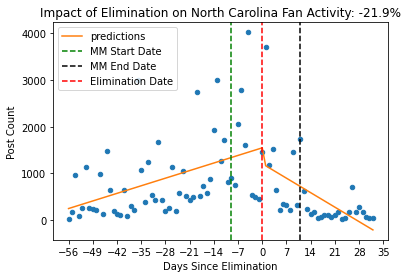

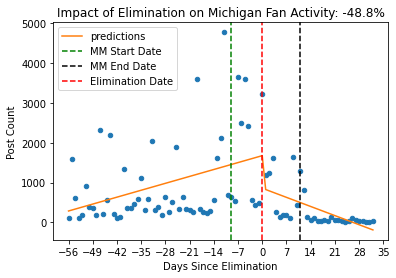

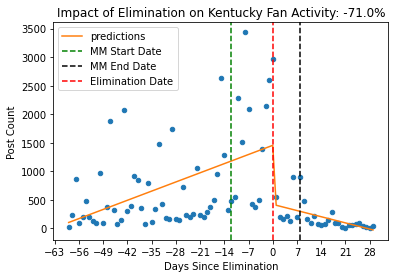

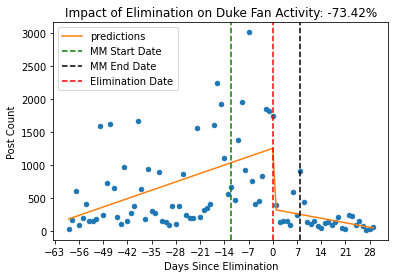

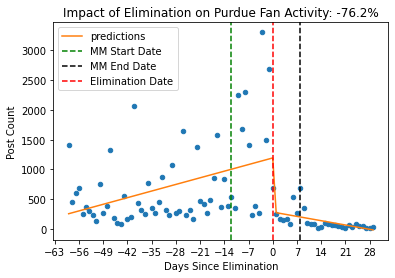

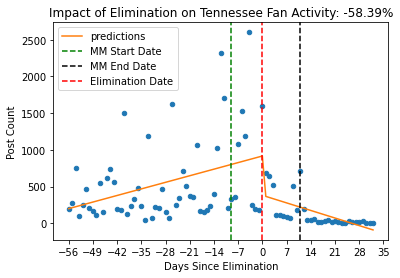

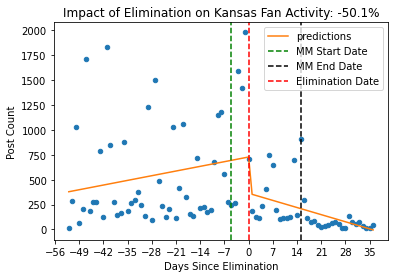

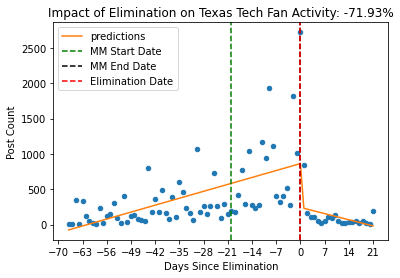

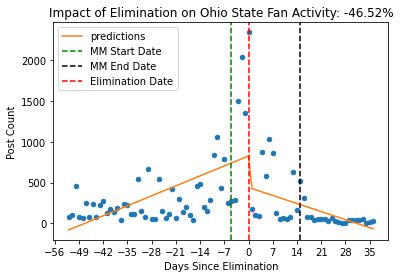

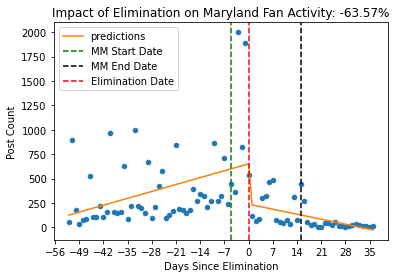

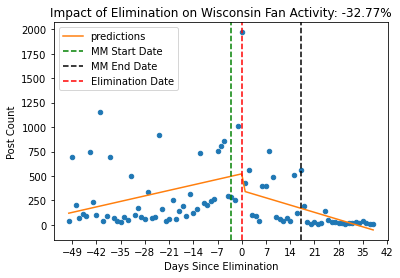

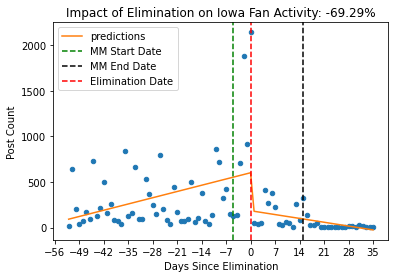

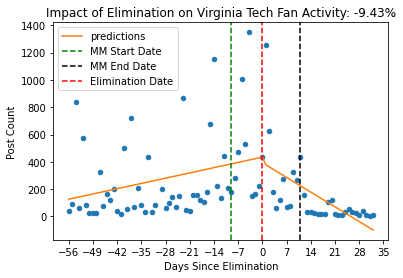

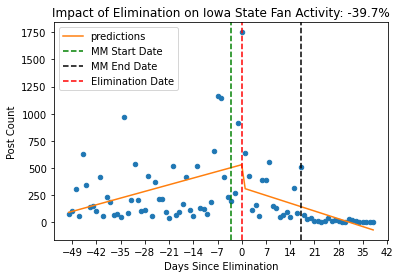

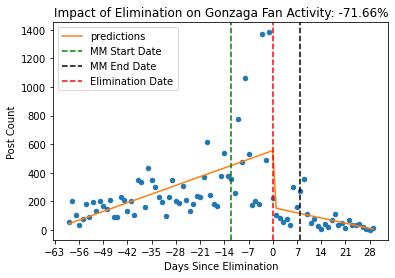

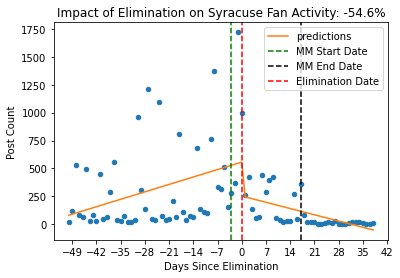

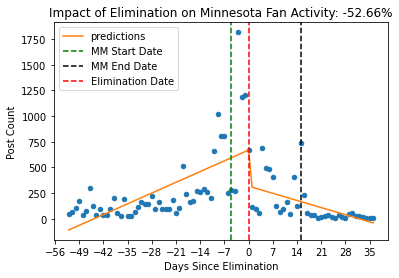

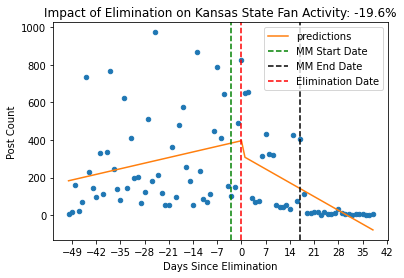

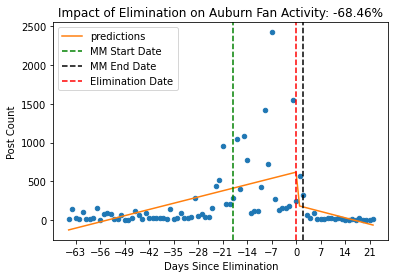

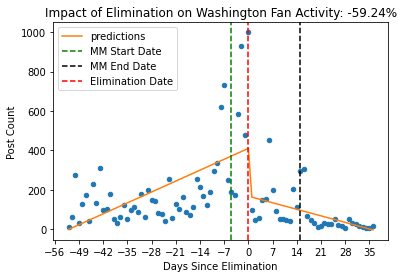

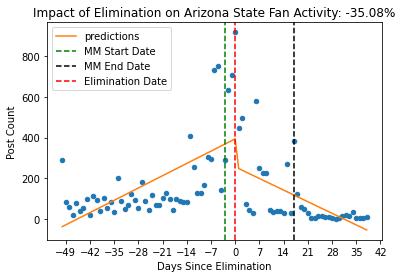

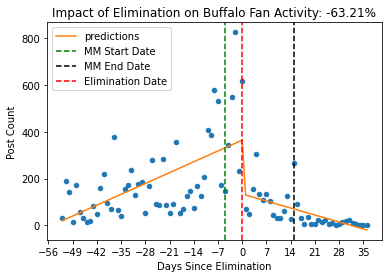

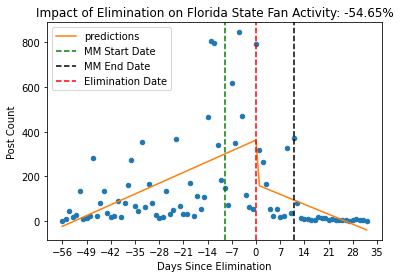

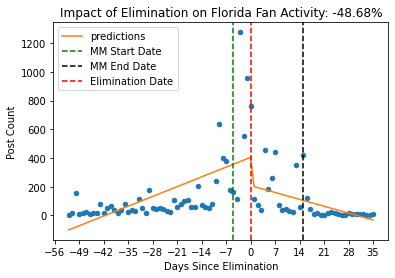

In [ ]:
for i in range(2,26):
  team = pd.read_csv('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/Comments_df+plt/'+str(tarray.at[i,'Teams'])+'.csv')
  s = team['created_utc'].value_counts().sort_index()
  s.index = pd.to_datetime(s.index.to_list(), format = "%Y-%m-%d")
  s.index = pd.to_datetime(s.index, format = "%Y-%m-%d")
  elim = pd.to_datetime(tarray.at[i,'Elim_Date'],format = "%Y-%m-%d")
  delta = (elim-start).days
  s = pd.DataFrame(s)
  s = s.reset_index()
  s.index -= delta
  s = s.drop(columns='index')
  s = s.reset_index()
  myLocator = mticker.MultipleLocator(7)
  rdd_df = s.assign(threshold=(s['index'] > 0).astype(int))
  model = smf.wls("created_utc~index*threshold", rdd_df).fit()
  model.summary().tables[1]
  ax = s.plot.scatter(x='index',y='created_utc', color="C0")
  s.assign(predictions=model.fittedvalues).plot(x='index', y='predictions', ax=ax, color="C1")
  ate_pct = 100*((model.params["threshold"] + model.params["Intercept"])/model.params["Intercept"] - 1)
  plt.title(f"Impact of Elimination on {str(tarray.at[i,'Teams'])} Fan Activity: {np.round(ate_pct, 2)}%")
  plt.axvline((MMstart-start).days - delta, linestyle = 'dashed', color = 'green',label = 'MM Start Date')
  plt.axvline((MMend-start).days - delta, linestyle = 'dashed', color = 'black', label = 'MM End Date')
  plt.axvline((elim-start).days - delta, color = 'red', linestyle = 'dashed', label = 'Elimination Date')
  plt.ylabel('Post Count')
  plt.xlabel('Days Since Elimination')
  plt.legend()
  ax.xaxis.set_major_locator(myLocator)
  tarray.at[i,'% Change'] = np.round(ate_pct, 2)
  plt.savefig('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/regression/'+str(tarray.at[i,'Teams'])+'.png')

In [ ]:
tarray_sort = tarray.sort_values('% Change', ascending=True)
tarray_sort = tarray_sort.reset_index()
seed = [6, 12, 1, 10, 4, 7, 37, 18, 22, 23, 33, 5, 14, 30, 39, 13, 8, 40, 41, 24, 45, 19, 3, 15, 16]
for i in range(len(seed)):
  tarray_sort.at[i,'Seed'] = seed[i]

tarray_sort = tarray_sort.reset_index()
seedcorr = pd.DataFrame(data = {'% Change Rank' : tarray_sort['level_0'],'Seed' : tarray_sort['Seed']})
seedcorr.corr()

,% Change Rank,Seed
% Change Rank,1.000000,0.330907
Seed,0.330907,1.000000


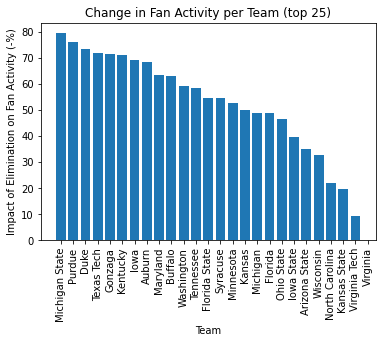

In [ ]:
plt.bar(tarray_sort['Teams'],-tarray_sort['% Change'])
plt.xticks(rotation = 90) 
plt.xlabel('Team')
plt.ylabel('Impact of Elimination on Fan Activity (-%)')
plt.title('Change in Fan Activity per Team (top 25)')
plt.savefig('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/regression/%change.png')

Text(0.5, 1.0, 'Team Seed Against Change in Fan Activity \n(Correlation = 0.330907)')

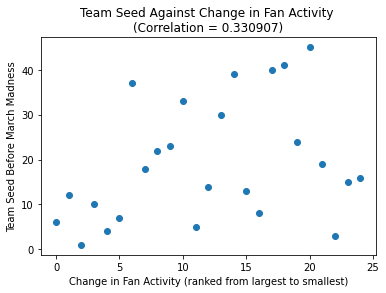

In [ ]:
plt.scatter(seedcorr['% Change Rank'],tarray_sort['Seed'])
plt.xlabel('Change in Fan Activity (ranked from largest to smallest)')
plt.ylabel('Team Seed Before March Madness')
plt.title('Team Seed Against Change in Fan Activity \n(Correlation = 0.330907)')

In [ ]:
tarray_sort.to_csv('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/2019-teams-unique2.csv', index=False) 

Text(0.5, 1.0, 'Team Seed Against Change in Activity (Correlation = 0.185306)')

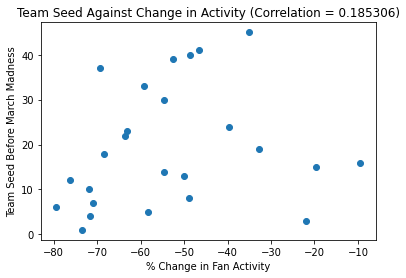

In [ ]:
seedcorr = pd.DataFrame(data = {'% Change Rank' : tarray_sort['% Change'],'Seed' : tarray_sort['Seed']})
plt.scatter(seedcorr['% Change Rank'],tarray_sort['Seed'])
plt.xlabel('% Change in Fan Activity')
plt.ylabel('Team Seed Before March Madness')
plt.title('Team Seed Against Change in Activity (Correlation = 0.185306)')

In [ ]:
seedcorr.corr()

,% Change Rank,Seed
% Change Rank,1.000000,0.185306
Seed,0.185306,1.000000


Text(0.5, 1.0, 'Team Seed Against Fan Activity \n(Correlation = -0.643652)')

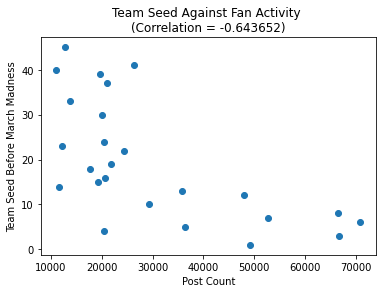

In [ ]:
seedcorr = pd.DataFrame(data = {'Tally' : tarray_sort['Tally'],'Seed' : tarray_sort['Seed']})
plt.scatter(seedcorr['Tally'],tarray_sort['Seed'])
plt.xlabel('Post Count')
plt.ylabel('Team Seed Before March Madness')
plt.title('Team Seed Against Fan Activity \n(Correlation = -0.643652)')

Text(0.5, 1.0, 'Team Seed Against Ranked Fan Activity \n(Correlation = -0.622356)')

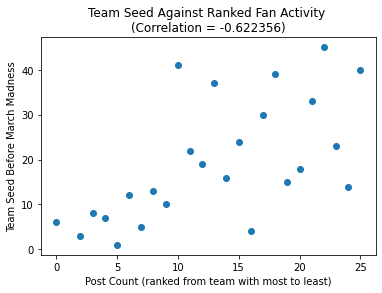

In [ ]:
seedcorr = pd.DataFrame(data = {'Index' : tarray_sort['index'],'Seed' : tarray_sort['Seed']})
plt.scatter(seedcorr['Index'],tarray_sort['Seed'])
plt.xlabel('Post Count (ranked from team with most to least)')
plt.ylabel('Team Seed Before March Madness')
plt.title('Team Seed Against Ranked Fan Activity \n(Correlation = -0.622356)')

Text(0.5, 1.0, 'Total Fan Activity Against Change in Fan Activity \n(Correlation = -0.191028)')

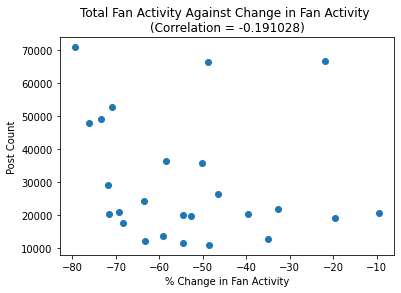

In [ ]:
tarray_sort = pd.read_csv('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/2019-teams-unique2.csv')
seedcorr = pd.DataFrame(data = {'% Change Rank' : tarray_sort['% Change'],'Tally' : tarray_sort['Tally']})
plt.scatter(seedcorr['% Change Rank'],tarray_sort['Tally'])
plt.xlabel('% Change in Fan Activity')
plt.ylabel('Post Count')
plt.title('Total Fan Activity Against Change in Fan Activity \n(Correlation = -0.191028)')

Text(0.5, 1.0, 'Ranked Fan Activity Against Change in Fan Activity \n(Correlation = 0.199332)')

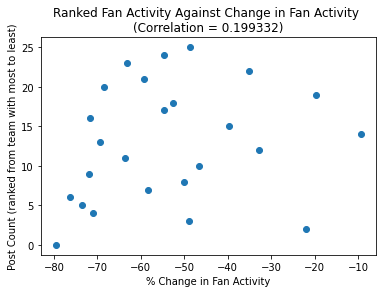

In [ ]:
tarray_sort = pd.read_csv('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/2019-teams-unique2.csv')
seedcorr = pd.DataFrame(data = {'% Change Rank' : tarray_sort['% Change'],'index' : tarray_sort['index']})
plt.scatter(seedcorr['% Change Rank'],tarray_sort['index'])
plt.xlabel('% Change in Fan Activity')
plt.ylabel('Post Count (ranked from team with most to least)')
plt.title('Ranked Fan Activity Against Change in Fan Activity \n(Correlation = 0.199332)')

Text(0.5, 1.0, 'Total Fan Activity Against Change in Fan Activity')

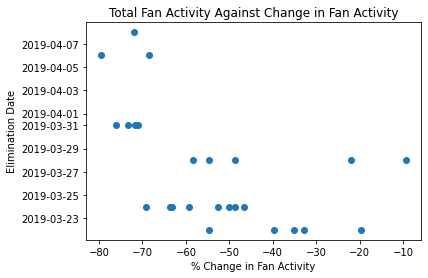

In [ ]:
tarray_sort['Elim_Date'] = pd.to_datetime(tarray_sort['Elim_Date'],format = "%Y-%m-%d")
for i in range(len(tarray_sort)):
  tarray_sort.at[i,'Days until elim'] = (tarray_sort.at[i,'Elim_Date']-MMstart).days
seedcorr = pd.DataFrame(data = {'% Change Rank' : tarray_sort['% Change'],'Elimination Date' : tarray_sort['Elim_Date']})
plt.scatter(seedcorr['% Change Rank'],tarray_sort['Elim_Date'])
plt.xlabel('% Change in Fan Activity')
plt.ylabel('Elimination Date')
plt.title('Total Fan Activity Against Change in Fan Activity')

Text(0.5, 1.0, 'Days Until Elimination Against Change in Fan Activity \n(Correlation = -0.538542)')

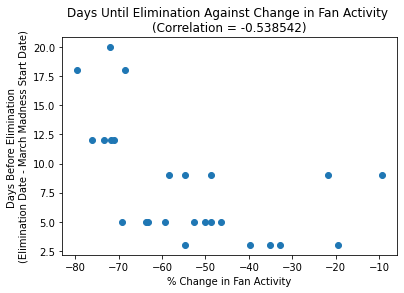

In [ ]:
seedcorr = pd.DataFrame(data = {'% Change Rank' : tarray_sort['% Change'],'Elimination Date' : tarray_sort['Days until elim']})
plt.scatter(seedcorr['% Change Rank'],tarray_sort['Days until elim'])
plt.xlabel('% Change in Fan Activity')
plt.ylabel('Days Before Elimination \n(Elimination Date - March Madness Start Date)')
plt.title('Days Until Elimination Against Change in Fan Activity \n(Correlation = -0.538542)')

ValueError: ignored

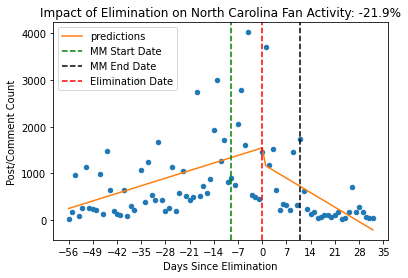

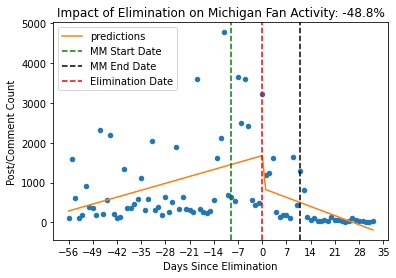

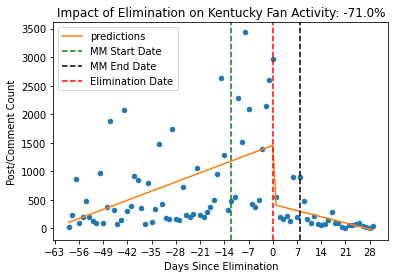

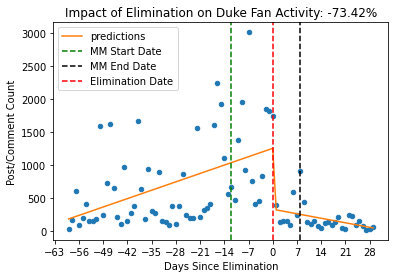

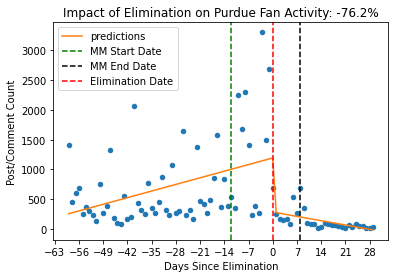

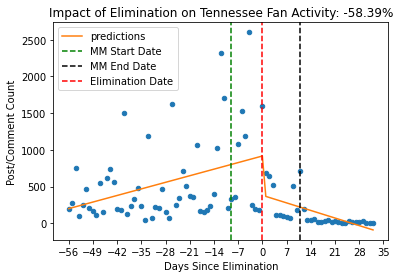

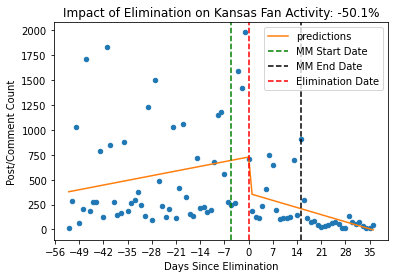

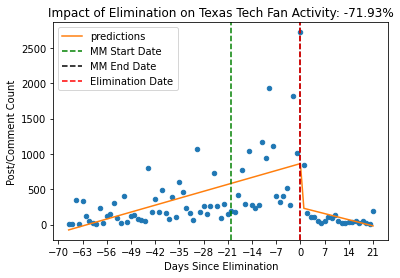

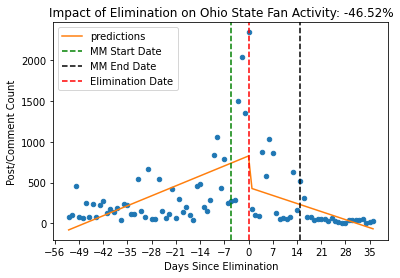

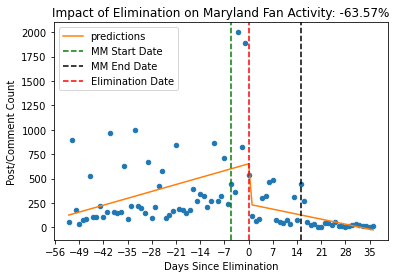

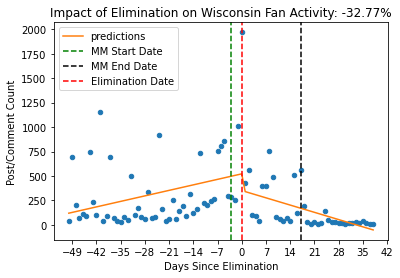

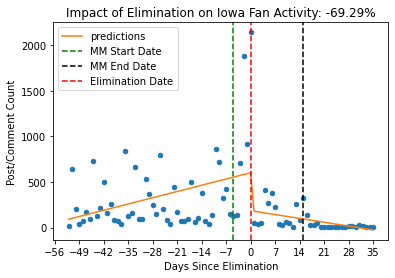

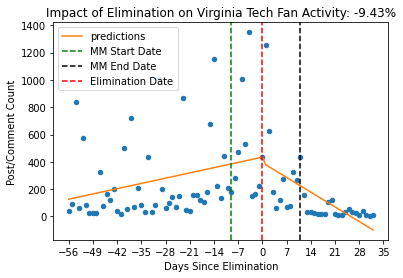

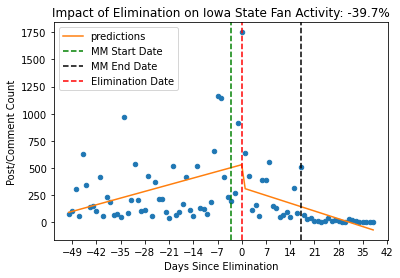

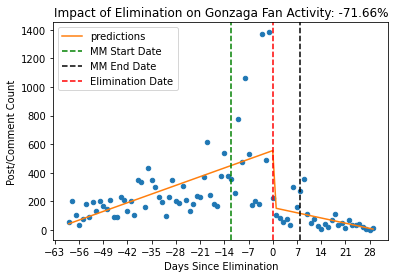

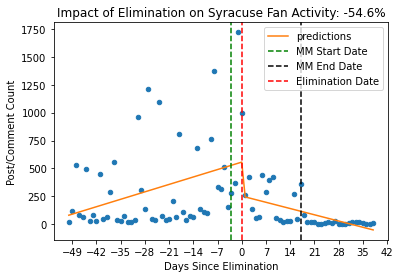

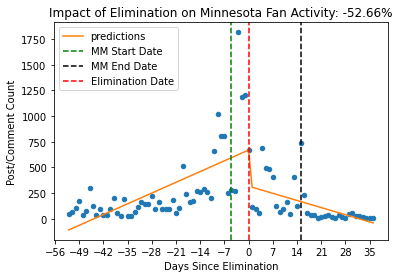

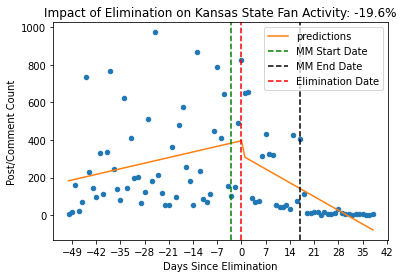

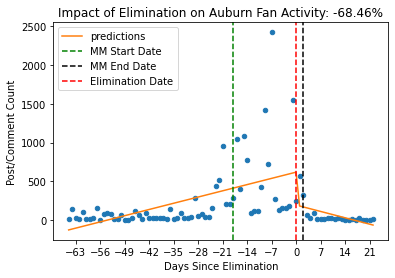

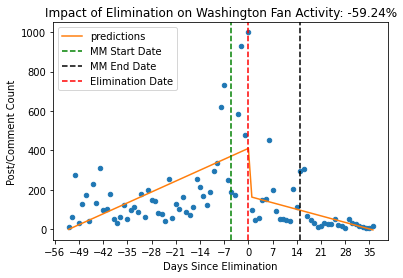

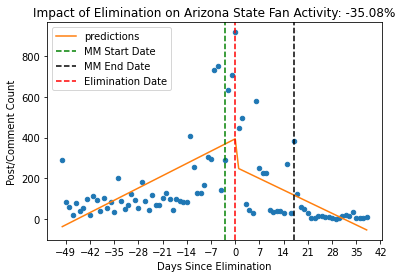

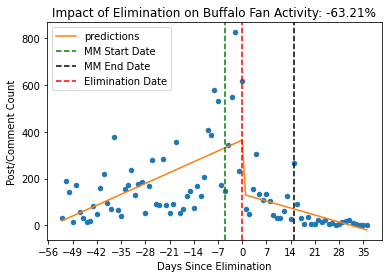

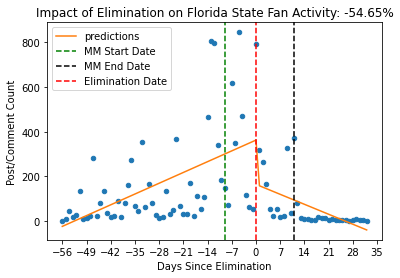

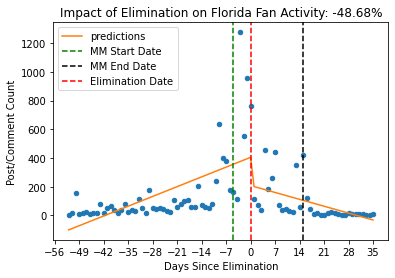

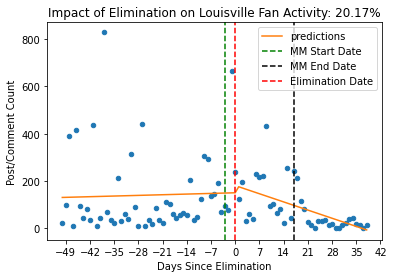

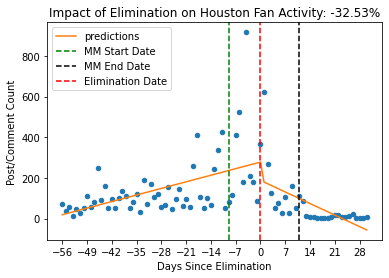

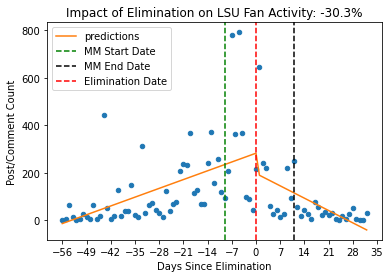

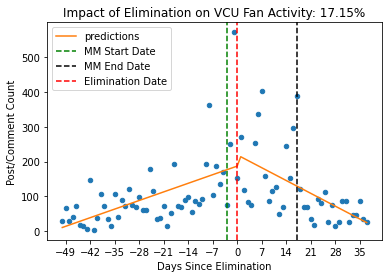

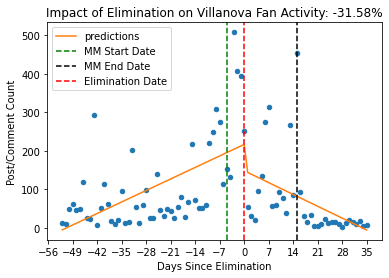

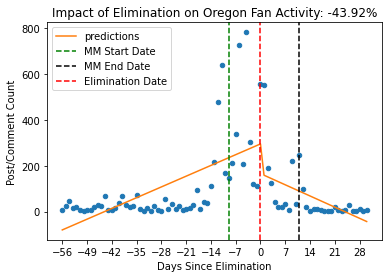

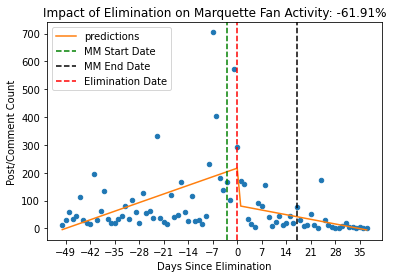

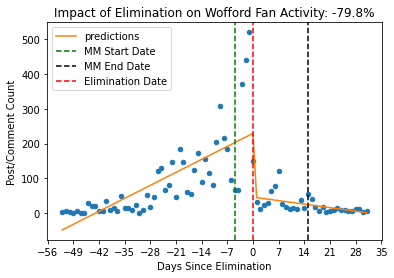

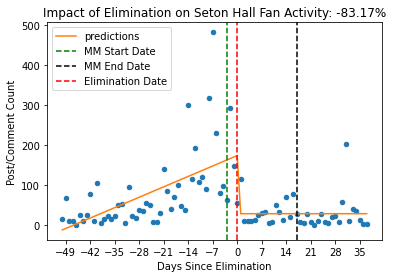

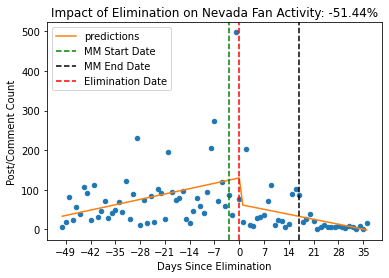

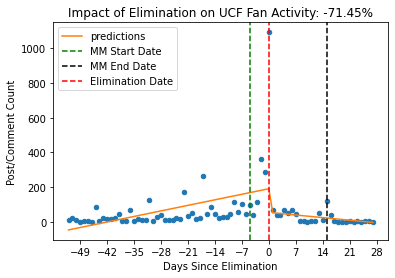

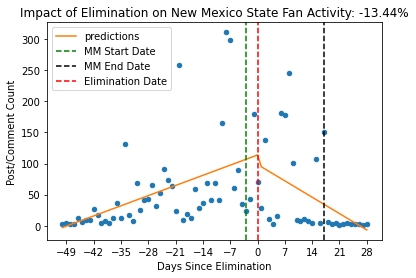

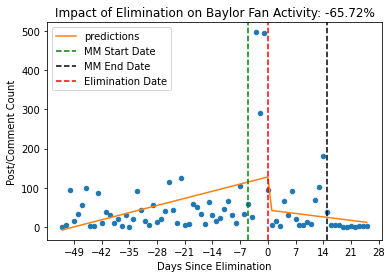

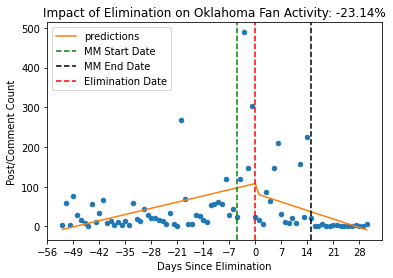

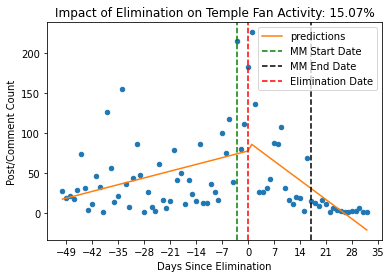

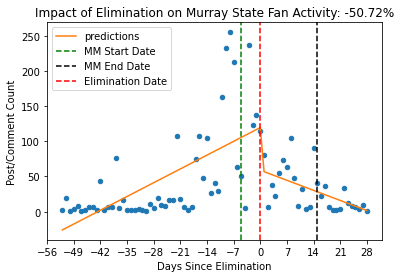

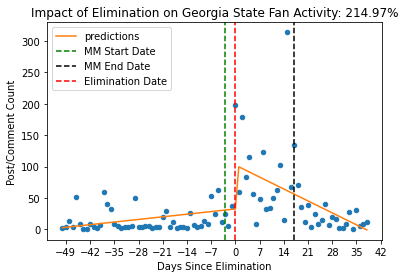

In [ ]:
for i in range(2,68):
  team = pd.read_csv('/content/gdrive/MyDrive/IDS131 Project/Data/Cleaned Data/Comments_df+plt/'+str(tarray.at[i,'Teams'])+'.csv')
  s = team['created_utc'].value_counts().sort_index()
  s.index = pd.to_datetime(s.index.to_list(), format = "%Y-%m-%d")
  s.index = pd.to_datetime(s.index, format = "%Y-%m-%d")
  elim = pd.to_datetime(tarray.at[i,'Elim_Date'],format = "%Y-%m-%d")
  delta = (elim-start).days
  s = pd.DataFrame(s)
  s = s.reset_index()
  s.index -= delta
  s = s.drop(columns='index')
  s = s.reset_index()
  myLocator = mticker.MultipleLocator(7)
  rdd_df = s.assign(threshold=(s['index'] > 0).astype(int))
  model = smf.wls("created_utc~index*threshold", rdd_df).fit()
  model.summary().tables[1]
  ax = s.plot.scatter(x='index',y='created_utc', color="C0")
  s.assign(predictions=model.fittedvalues).plot(x='index', y='predictions', ax=ax, color="C1")
  ate_pct = 100*((model.params["threshold"] + model.params["Intercept"])/model.params["Intercept"] - 1)
  plt.title(f"Impact of Elimination on {str(tarray.at[i,'Teams'])} Fan Activity: {np.round(ate_pct, 2)}%")
  plt.axvline((MMstart-start).days - delta, linestyle = 'dashed', color = 'green',label = 'MM Start Date')
  plt.axvline((MMend-start).days - delta, linestyle = 'dashed', color = 'black', label = 'MM End Date')
  plt.axvline((elim-start).days - delta, color = 'red', linestyle = 'dashed', label = 'Elimination Date')
  plt.ylabel('Post/Comment Count')
  plt.xlabel('Days Since Elimination')
  plt.legend()
  ax.xaxis.set_major_locator(myLocator)
  tarray.at[i,'% Change'] = np.round(ate_pct, 2)